**Bollinger Bands**

The concept of Bollinger bands was developed by John Bollinger. These bands comprise of an upper Bollinger band and a lower Bollinger band and are placed two standard deviations above and below a moving average.

Bollinger bands expand and contract based on the volatility. During a period of rising volatility, the bands widen, and they contract as the volatility decreases. Prices are considered to be relatively high when they move above the upper band and relatively low when they go below the lower band.

**Estimation**

To create the bands, we first compute the SMA and then use this to compute the bands values.

**Middle Band** = 20-day simple moving average (SMA)

**Upper Band** = 20-day SMA + (2 x 20-day standard deviation of price)

**Lower Band** = 20-day SMA - (2 x 20-day standard deviation of price)

**Analysis**

To use Bollinger bands for generating signals, a simple approach would be to use the upper and the lower bands as the price targets. If the price bounces off the lower band and crosses the moving average line, the upper band becomes the upper price target.

In the case of a crossing of the price below the moving average line, the lower band becomes the downside target price.

**Python code for computing Bollinger Bands for NIFTY**

In the code below we rolling function to create the Bollinger band function. The mean and the standard deviation methods are used to compute these respective metrics using the close price. Once we have computed the mean and the standard deviation, we compute the upper Bollinger band and the lower Bollinger band. The Bollinger band function is called on the NIFTY price data using the 50-day moving average window.

                   High          Low  ...      UpperBB      LowerBB
Date                                  ...                          
2014-01-02  6358.299805  6211.299805  ...          NaN          NaN
2014-01-03  6221.700195  6171.250000  ...          NaN          NaN
2014-01-06  6224.700195  6170.250000  ...          NaN          NaN
2014-01-07  6221.500000  6144.750000  ...          NaN          NaN
2014-01-08  6192.100098  6160.350098  ...          NaN          NaN
...                 ...          ...  ...          ...          ...
2015-12-24  7888.750000  7835.500000  ...  8322.916338  7546.217724
2015-12-28  7937.200195  7863.000000  ...  8313.835341  7546.560714
2015-12-29  7942.149902  7902.750000  ...  8305.347537  7546.938518
2015-12-30  7944.750000  7889.850098  ...  8297.541618  7546.278441
2015-12-31  7955.549805  7891.149902  ...  8285.543873  7548.950190

[485 rows x 8 columns]


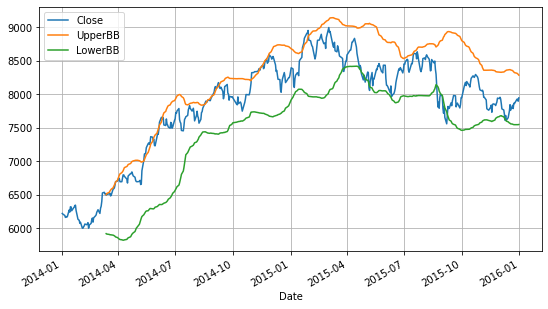

In [7]:
# Bollinger Bands indicator

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import yfinance
import pandas as pd

# Compute the Bollinger Bands 
def BBANDS(data, window):
    MA = data.Close.rolling(window).mean()
    SD = data.Close.rolling(window).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data
 
# Retrieve the Nifty data from Yahoo finance:
data = pdr.get_data_yahoo("^NSEI", start="2014-01-01", end="2016-01-01") 
data = pd.DataFrame(data)

# Compute the Bollinger Bands for NIFTY using the 50-day Moving average
n = 50
NIFTY_BBANDS = BBANDS(data, n)
print(NIFTY_BBANDS)

# Create the plot
pd.concat([NIFTY_BBANDS.Close,NIFTY_BBANDS.UpperBB,NIFTY_BBANDS.LowerBB],axis=1).plot(figsize=(9,5),grid=True)